### V. Algorithm Selection and fine tuning

In this part, we create a model, we try different algorithms and see which one delivers the best results. Then we chose the best algorithm and fine tune it. 

This notebook presents the following parts:

    1) Model creation
    2) Algorithm testing : Linear Regression (simple, lasso, ridge), Boosted decision tree regressor , Random forest regressor, Bayesian linear regressor
    3) Chosing best algorithm
    4) Improving the algorithm
        - Finding best hyperparamters
        - Updating best parameters on exisitng best algorithm
        - Check for improvement
    5) Save model
    6) Verification that the **model created will generalize well** (visualizations, etc.)

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from tabulate import tabulate

%matplotlib inline
%matplotlib inline

In [2]:
#import data set
df=pd.read_csv('dfprepared3.csv')
df.shape

(1399, 18)

In [3]:
df.head(2)

,capacity,failure_rate,margin,price,prod_cost,product_type:_auto-portee,product_type:_electrique,product_type:_essence,Quality:_Basic,Quality:_High,Quality:_Medium,Warranty_years:_1,Warranty_years:_2,Warranty_years:_3,Perc_Margin:_High,Perc_Margin:_Low,Perc_Margin:_Medium,attractiveness
0,-1.873473,-1.683579,2.342817,2.187839,0.911872,1,0,0,1,0,0,0,0,1,0,0,1,0.650648
1,-1.380486,-1.746504,2.854882,2.395929,0.583018,1,0,0,1,0,0,0,0,1,0,0,1,0.699792


**1) Model Creation**

In [4]:
# create the model
X = df.loc[:, df.columns != 'attractiveness']
y = df['attractiveness']


In [5]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**2) Algoirthm testing**

2.1Algorithm: **Linear Regression**

2.1.1 Linear Regression Simple

In [6]:
#Train the Model and predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_predictions = lm.predict(X_test)

In [7]:
#print RMSLE
print ('Simple Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, lm_predictions)))

Simple Regression RMSLE is 0.07008445021729998


2.1.2 Lasso Linear Regression (l1)

In [8]:
#Train the Model and predict
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error
Lasso = Lasso()
Lasso.fit(X_train,y_train)
Lasso_predictions = Lasso.predict(X_test)

In [9]:
#print RMSLE
print ('Lasso Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Lasso_predictions)))

Lasso Regression RMSLE is 0.075675870769306


2.1.3 Ridge Regression (l2)

In [10]:
#Train the Model and predict
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error
Ridge = Ridge()
Ridge.fit(X_train,y_train)
Ridge_predictions = Ridge.predict(X_test)

In [11]:
#print RMSLE
print ('Ridge Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Ridge_predictions)))

Ridge Regression RMSLE is 0.07083195444913133


2.2 Algorithm: **Boosted Decision Tree Regressor**

In [12]:
#Train the Model and predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_log_error
Tree = DecisionTreeRegressor()
Tree.fit(X_train,y_train)
Tree_predictions = Tree.predict(X_test)

In [13]:
#print RMSLE
print ('Boosted Decision Tree Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Tree_predictions)))

Boosted Decision Tree Regression RMSLE is 0.059699084248885814


2.3 Algorithm: **Random Forest Regressor**

In [14]:
#Train the Model and predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
Forest = RandomForestRegressor()
Forest.fit(X_train,y_train)
Forest_predictions = Forest.predict(X_test)

C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
#print RMSLE
print ('Random Forest Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Forest_predictions)))

Random Forest Regression RMSLE is 0.04774438066041904


2.4 Algorithm: **Bayesian Linear Regressor**

In [16]:
#Train the Model and predict
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_log_error
Bayesian = BayesianRidge()
Bayesian.fit(X_train,y_train)
Bayesian_predictions = Bayesian.predict(X_test)

In [17]:
#print RMSLE
print ('Bayesian Ridge Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Bayesian_predictions)))

Bayesian Ridge Regression RMSLE is 0.0701753063618716


**3. Compare and chose best model**

In [18]:
print ('Simple Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, lm_predictions)))
print ('Lasso Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Lasso_predictions)))
print ('Ridge Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Ridge_predictions)))
print ('Boosted Decision Tree Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Tree_predictions)))
print ('Random Forest Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Forest_predictions)))
print ('Bayesian Ridge Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Bayesian_predictions)))

Simple Regression RMSLE is 0.07008445021729998
Lasso Regression RMSLE is 0.075675870769306
Ridge Regression RMSLE is 0.07083195444913133
Boosted Decision Tree Regression RMSLE is 0.059699084248885814
Random Forest Regression RMSLE is 0.04774438066041904
Bayesian Ridge Regression RMSLE is 0.0701753063618716


Clearly Random Forest is the best algorithm as it has lowest RMSLE

**4) Improving the model**

In [19]:
# See if there is any feature with 0 coefficient
rf= RandomForestRegressor(n_jobs=2, n_estimators=1000)
values = sorted(zip(X_train.columns, Forest.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, tablefmt="plain"))

price                      0.26726
failure_rate               0.229744
capacity                   0.211686
margin                     0.132453
prod_cost                  0.0725736
Quality:_Basic             0.0542076
Quality:_Medium            0.00875499
Perc_Margin:_Medium        0.0083969
Perc_Margin:_Low           0.00611947
Quality:_High              0.00593851
Perc_Margin:_High          0.00154628
Warranty_years:_1          0.000325425
product_type:_essence      0.000319311
product_type:_electrique   0.000253047
Warranty_years:_3          0.000250089
Warranty_years:_2          0.000152358
product_type:_auto-portee  1.90883e-05


Since there is no feature with 0 coefficient, there is no need to prune any feature for improve Random Forest Regressor.

4.1 Find best model hyperparameters

In [20]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [21]:
# Create Random Hyperparamter Grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [22]:
# Random Search Training
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

4.2 Updating best parameters on exisitng best algorithm

In [34]:
from sklearn.ensemble import RandomForestRegressor
Forestimproved = RandomForestRegressor(n_estimators = 200, min_samples_split=2, 
                                       min_samples_leaf=1, max_features='auto', max_depth=100, bootstrap=True)

In [35]:
Forestimproved.fit(X_train, y_train)
Forestimproved_predictions = Forestimproved.predict(X_test)
print ('Forest Improved Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Forestimproved_predictions)))

Forest Improved Regression RMSLE is 0.04328908410960059


4.3 Check for **improvement on RMSLE**

In [36]:
print ('Random Forest Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Forest_predictions)))
print ('Forest Improved Regression RMSLE is', np.sqrt(mean_squared_log_error(y_test, Forestimproved_predictions)))
print ('RMSLE improvement on new Forest Random Regressor is =', (np.sqrt(mean_squared_log_error(y_test, Forest_predictions))-np.sqrt(mean_squared_log_error(y_test, Forestimproved_predictions))))

Random Forest Regression RMSLE is 0.04774438066041904
Forest Improved Regression RMSLE is 0.04328908410960059
RMSLE improvement on new Forest Random Regressor is = 0.004455296550818451


**5. Save model improved**

In [37]:
# Saving LogRec model
from sklearn.externals import joblib
from joblib import dump, load

In [38]:
dump(Forestimproved,'Forestimproved.joblib')  

['Forestimproved.joblib']

**6. Verification that the model created will generalize well**

In [39]:
def print_metrics(y_train, y_test, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_train, y_test)
    r2_adj = r2 - (n_parameters - 1)/(y_train.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_train, y_test)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_train, y_test))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_train, y_test)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_train, y_test)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = Forestimproved.predict(X_test) 
print_metrics(y_test, y_score, 28)

Mean Square Error      = 0.004983490486676984
Root Mean Square Error = 0.07059384170504523
Mean Absolute Error    = 0.05549413680422417
Median Absolute Error  = 0.045409266762831024
R^2                    = 0.6675246572062036
Adjusted R^2           = 0.6446245698198961


Given the difference between R^2 and Adjusted R2 is so small, we can safely infer that the model will generalize well.

In [40]:
#Lets look at the residuals plot 

## Calculate residuals (y-yhat)
df['residuals']=y_train - y_test

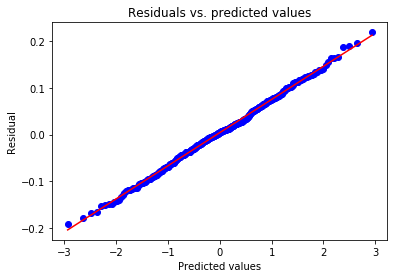

In [41]:
def resid_qq(y_train, y_test):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids, plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_train, y_test)   

As with the histogram, the Q-Q Normal plot indicates the residuals are close to Normally distributed, show some skew (deviation from the straight line). This is particularly for large residuals.

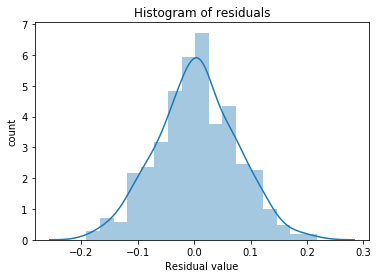

In [42]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score) 

This plot looks reasonable. The residual values are distributed near both sides of 0.

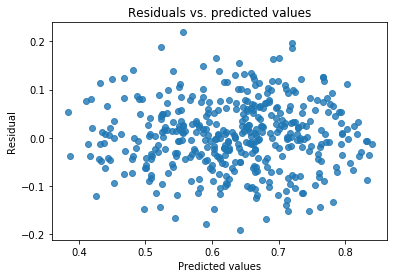

In [43]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score)

As expected, when plotting residuals we cannot see any clear pattern. Otherwise it would mean there is a hidden pattern we could not identify.

Consequently, we can conclude the model we have created will generalize well. 